# <div style="text-align:center;"> <font color="red">Unsuprvised learning</font></div>

## <font color="green"> Objective: </font>

#### The objective of this assessment is to evaluate your understanding and ability to apply clustering techniques to a real-world dataset.

## <font color="green">1.Loading and Preprocessing </font>

### <font color="blue">1.1 Load the Iris Dataset from sklearn</font>

#### The Iris dataset is a classic dataset in machine learning, available directly from the sklearn library.

### <font color="blue">1.2 Drop the Species Column</font>

#### Since this is a clustering problem, we will drop the species column.

In [2]:
# Importing all required Modules and libraries
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [3]:
# Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data = iris.data, columns = iris.feature_names)

In [4]:
# Exploration of Iris dataset
# Show the first few rows
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
# Show the last 5 rows
iris_df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [6]:
# Display information about the data
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [7]:
# Show statistical summary of data
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
# Let us check the number of rows and columns of data
iris_df.shape

(150, 4)

In [9]:
# Let us check for null values
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

## <font color="green">2.Clustering Algorithm Implementation </font>

### <font color="blue">2.1 KMeans Clustering</font>

### <font color="brown">A) Description of KMeans Clustering</font>

#### KMeans clustering is a partition-based clustering method that divides the data into K clusters. The algorithm follows these steps:
#### 1. Initialize K cluster centroids randomly.
#### 2. Assign each data point to the nearest cluster centroid.
#### 3. Update the centroids by calculating the mean of the points assigned to each cluster.
#### 4. Repeat steps 2 and 3 until convergence (i.e., centroids do not change significantly).

### <font color="brown">B) Suitability for the Iris Dataset</font>

#### KMeans clustering is suitable for the Iris dataset because it aims to partition the data into clusters based on feature similarities. The Iris dataset has well-defined clusters that correspond to different species of flowers, making it an ideal candidate for KMeans.

### <font color="brown">C) Apply KMeans Clustering and Visualize Clusters</font>

In [11]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
iris_df['kmeans_cluster'] = kmeans.fit_predict(iris_df)

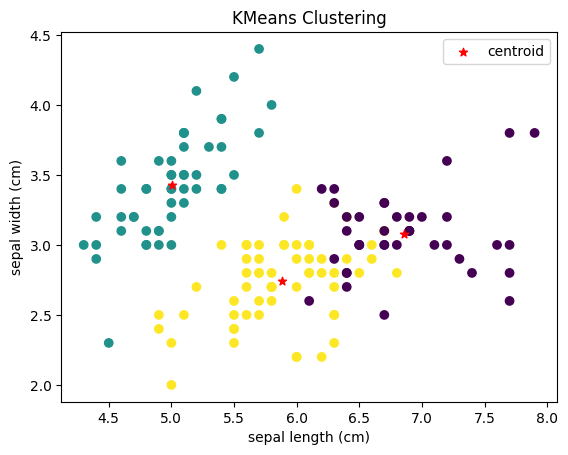

In [12]:
# visualize the clusters
plt.scatter(iris_df.iloc[:, 0], iris_df.iloc[:, 1], c=iris_df['kmeans_cluster'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='red',marker='*',label='centroid')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('KMeans Clustering')
plt.legend()
plt.show()

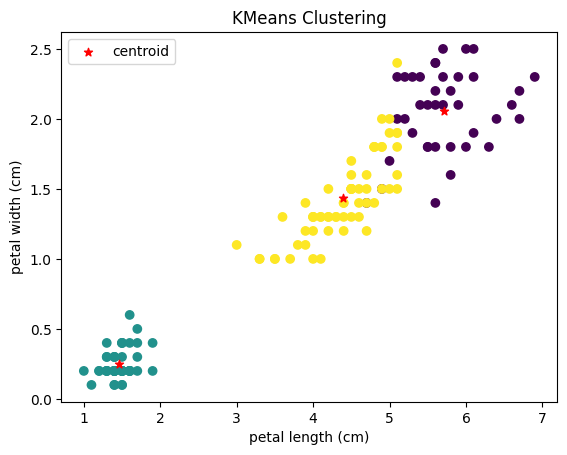

In [13]:
plt.scatter(iris_df.iloc[:, 2], iris_df.iloc[:, 3], c=iris_df['kmeans_cluster'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:,2],kmeans.cluster_centers_[:,3],color='red',marker='*',label='centroid')
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.title('KMeans Clustering')
plt.legend()
plt.show()

### <font color="blue">2.2 Hierarchical Clustering</font>

### <font color="brown">A) Description of Hierarchical Clustering</font>

#### Hierarchical clustering is a method of cluster analysis which seeks to build a hierarchy of clusters. There are two main types:
#### * Agglomerative (bottom-up): Start with each point as a single cluster and merge the closest pairs of clusters until only one cluster remains.
#### * Divisive (top-down): Start with all points in one cluster and split the clusters iteratively until each cluster contains a single point.

### <font color="brown">B) Suitability for the Iris Dataset</font>

#### Hierarchical clustering is suitable for the Iris dataset because it can reveal the underlying structure of the data by providing a tree-like dendrogram, which can be useful to understand how clusters are formed and their relationships.

### <font color="brown">C) Apply Hierarchical Clustering and Visualize Clusters</font>

In [14]:
# Apply hierarchical clustering
linkage_matrix = linkage(iris_df.iloc[:,:-1],method ='ward')
agg_cluster = AgglomerativeClustering(n_clusters = 3)
iris_df['agg_cluster']=agg_cluster.fit_predict(iris_df.iloc[:,:-1])

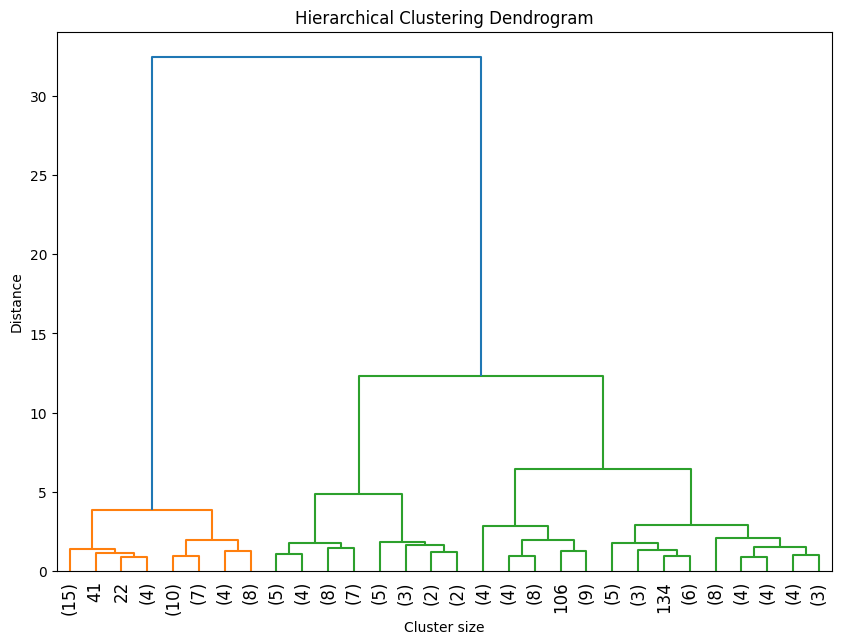

In [15]:
# Visualize the dendrogram
plt.figure(figsize=(10,7))
dendrogram(linkage_matrix, truncate_mode='lastp',p=30, leaf_rotation=90.,leaf_font_size=12.)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster size')
plt.ylabel('Distance')
plt.show()

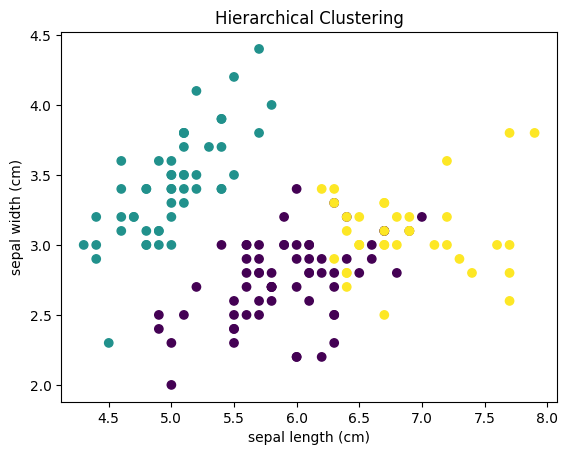

In [16]:
# Visualize the clusters
plt.scatter(iris_df.iloc[:,0],iris_df.iloc[:,1],c=iris_df['agg_cluster'], cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('Hierarchical Clustering')
plt.show()

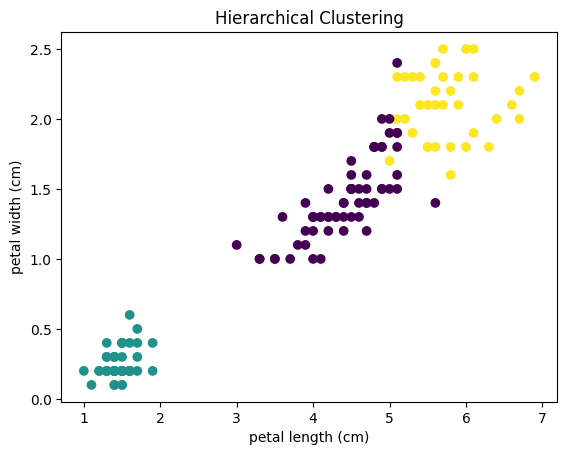

In [17]:
plt.scatter(iris_df.iloc[:,2],iris_df.iloc[:,3],c=iris_df['agg_cluster'], cmap='viridis')
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.title('Hierarchical Clustering')
plt.show()

### <font color="olive">Summary</font>

#### This assessment demonstrates the implementation of KMeans and Hierarchical clustering on the Iris dataset. Each method is applied to the preprocessed data, and the clusters are visualized to provide insights into the clustering results.